In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.math import confusion_matrix
from tensorflow.keras import Input
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from PIL import Image

In [10]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [13]:
#scaling the values between 0 & 1
X_train=X_train/255
X_test=X_test/255

In [14]:
#creating model and adding layers


model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
#model.summary()

In [16]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
#training the model
model.fit(X_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2720 - val_accuracy: 0.9498 - val_loss: 0.1619
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9651 - loss: 0.1146 - val_accuracy: 0.9672 - val_loss: 0.1074
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9754 - loss: 0.0793 - val_accuracy: 0.9678 - val_loss: 0.1049
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9820 - loss: 0.0570 - val_accuracy: 0.9743 - val_loss: 0.0919
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9857 - loss: 0.0440 - val_accuracy: 0.9745 - val_loss: 0.0912
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 0.9720 - val_loss: 0.1080
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9693 - val_loss: 0.1172
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0244 - 

In [18]:
loss,accuracy=model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.1229
0.9778000116348267


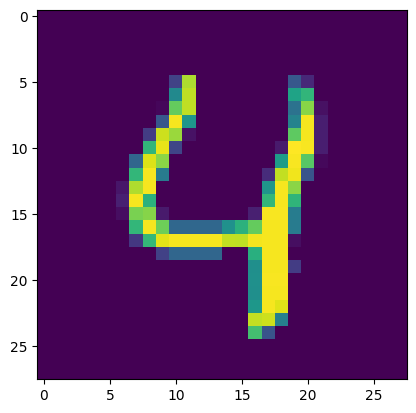

In [19]:
#testing
plt.imshow(X_test[4])
plt.show()

In [20]:
#calculating the probabilities for all labels
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


In [21]:
#perdicting the correct label
y_pred=np.argmax(y_prob,axis=1)
print(y_pred[707])

4


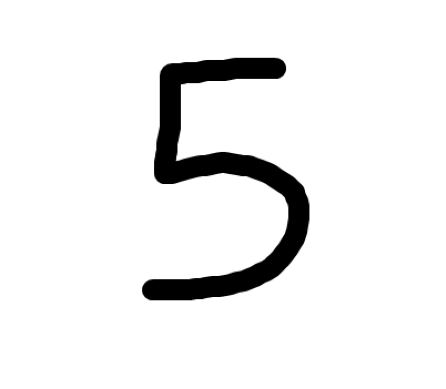

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
the handwritten label is  [5]


In [22]:
#real time prediction
path='5.png'
input_image=cv2.imread(path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
img_resized=cv2.resize(grayscale,(28,28),interpolation=cv2.INTER_NEAREST)
img_resized=img_resized/255
img_resized = 1 - img_resized
img_reshaped=np.reshape(img_resized,[1,28,28])
input_pred=model.predict(img_reshaped)
input_pred_label=np.argmax(input_pred,axis=1)
print('the handwritten label is ',input_pred_label)